In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig

In [3]:
from childes_mi.information_theory import model_fitting as mf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [7]:
MI_DF = pd.read_pickle(DATA_DIR/'mi/zebra_fish_longest.pickle')

In [8]:
MI_DF[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,condition,bout_len
0,"[3.6160812103314255, 3.416079422364989, 3.3585...","[0.08675540320246419, 0.08494038479067434, 0.0...","[3.30933957261308, 3.3053806950690134, 3.30555...","[0.08573309140832686, 0.0851714340072155, 0.08...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3minLightDark,2430
0,"[3.567153544450651, 3.367099427547494, 3.31127...","[0.07413824353274776, 0.07357521034624526, 0.0...","[3.2485276943822496, 3.2504032668457388, 3.237...","[0.07446854441740954, 0.07410522791187488, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3minLightDark,2219
0,"[3.5607804498409665, 3.350896857876787, 3.2808...","[0.08092161608016024, 0.08078144966519044, 0.0...","[3.2166231094602953, 3.2083505249868027, 3.219...","[0.0805620291739147, 0.08162669462228765, 0.08...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3minLightDark,2202


### fit data

In [9]:
MI_DF = MI_DF.assign(**{i:np.nan for i in ['exp_results', 'pow_results', 'concat_results',
     'R2_exp', 'R2_concat', 'R2_power', 'AICc_exp',
     'AICc_concat', 'AICc_power', 'bestfitmodel', 'curvature', 'min_peak']})
MI_DF['curvature'] = MI_DF['curvature'].astype(object)

In [12]:
MI_DF = MI_DF.reset_index()

In [13]:
n = 100 # max distance for computation
for idx, row in tqdm(MI_DF.iterrows(), total=len(MI_DF)):
    # get signal
    sig = np.array(row.MI-row.shuff_MI)
    distances = row.distances
    # fit models
    results_power, results_exp, results_pow_exp, best_fit_model = mf.fit_models(distances, sig)

    # get fit results
    R2_exp, R2_concat, R2_power, AICc_exp, \
        AICc_pow, AICc_concat = mf.fit_results(sig, distances, 
                                              results_exp, results_power,
                                              results_pow_exp)
    min_peak = np.nan
    
    # get save model fit results to MI_DF
    MI_DF.loc[idx, np.array(['exp_results', 'pow_results', 'concat_results',
                         'R2_exp', 'R2_concat', 'R2_power', 'AICc_exp',
                         'AICc_concat', 'AICc_power', 'bestfitmodel',  'min_peak'])] = [
        results_exp, results_power, results_pow_exp,
        R2_exp, R2_concat, R2_power, AICc_exp,
        AICc_concat, AICc_pow, best_fit_model,
        min_peak
    ]

/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/childes_mi/information_theory/model_fitting.py:8: RuntimeWarning: invalid value encountered in log
  return np.abs(np.log(y_true) - np.log(y_model)) * (1 / (np.log(1 + x)))
/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/childes_mi/information_theory/model_fitting.py:8: RuntimeWarning: divide by zero encountered in log
  return np.abs(np.log(y_true) - np.log(y_model)) * (1 / (np.log(1 + x)))
/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/childes_mi/information_theory/model_fitting.py:216: RuntimeWarning: invalid value encountered in greater
  mask = sig > 0


In [14]:
MI_DF[:3]

,level_0,index,MI,MI_var,shuff_MI,shuff_MI_var,distances,condition,bout_len,exp_results,...,concat_results,R2_exp,R2_concat,R2_power,AICc_exp,AICc_concat,AICc_power,bestfitmodel,curvature,min_peak
0,0,0,"[3.6160812103314255, 3.416079422364989, 3.3585...","[0.08675540320246419, 0.08494038479067434, 0.0...","[3.30933957261308, 3.3053806950690134, 3.30555...","[0.08573309140832686, 0.0851714340072155, 0.08...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3minLightDark,2430,<lmfit.minimizer.MinimizerResult object at 0x7...,...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.567279,0.612975,0.609895,-2342.799686,-2417.093998,-2415.580963,pow_exp,NaN,NaN
1,1,0,"[3.567153544450651, 3.367099427547494, 3.31127...","[0.07413824353274776, 0.07357521034624526, 0.0...","[3.2485276943822496, 3.2504032668457388, 3.237...","[0.07446854441740954, 0.07410522791187488, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3minLightDark,2219,<lmfit.minimizer.MinimizerResult object at 0x7...,...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.534056,0.555029,0.555029,-2766.079439,-2798.418417,-2802.464413,pow,NaN,NaN
2,2,0,"[3.5607804498409665, 3.350896857876787, 3.2808...","[0.08092161608016024, 0.08078144966519044, 0.0...","[3.2166231094602953, 3.2083505249868027, 3.219...","[0.0805620291739147, 0.08162669462228765, 0.08...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3minLightDark,2202,<lmfit.minimizer.MinimizerResult object at 0x7...,...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.567240,0.567432,0.562288,-2155.102389,-2151.345486,-2147.455245,exp,NaN,NaN


### plot fits

In [15]:
from matplotlib import gridspec

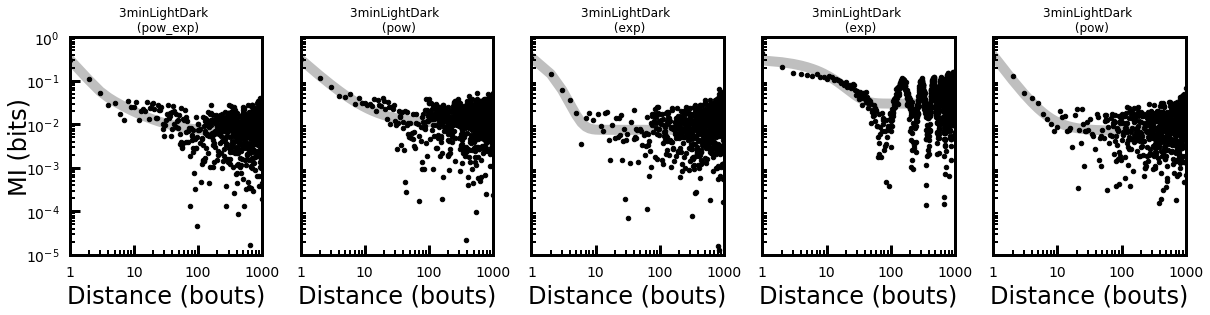

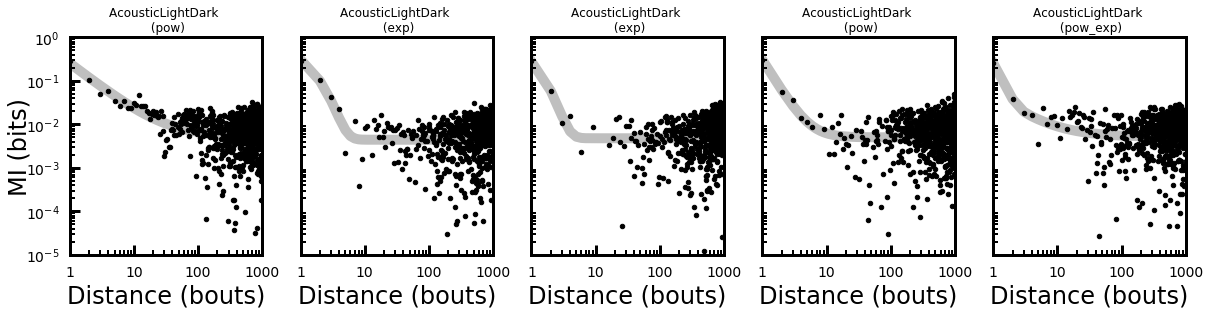

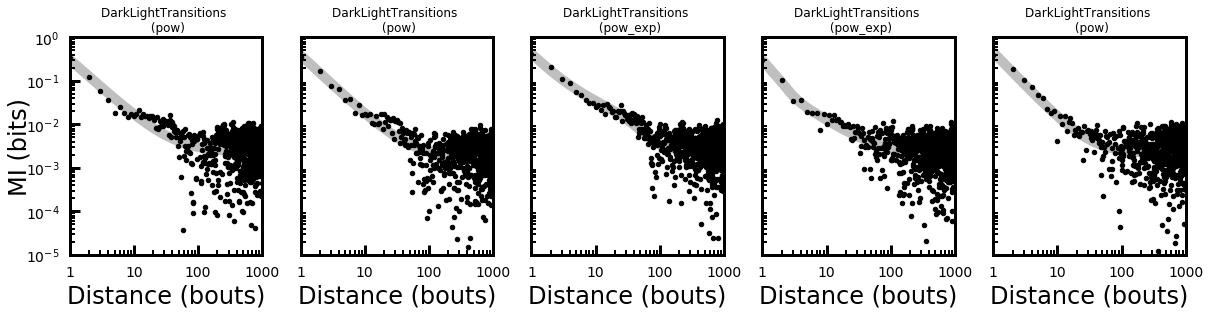

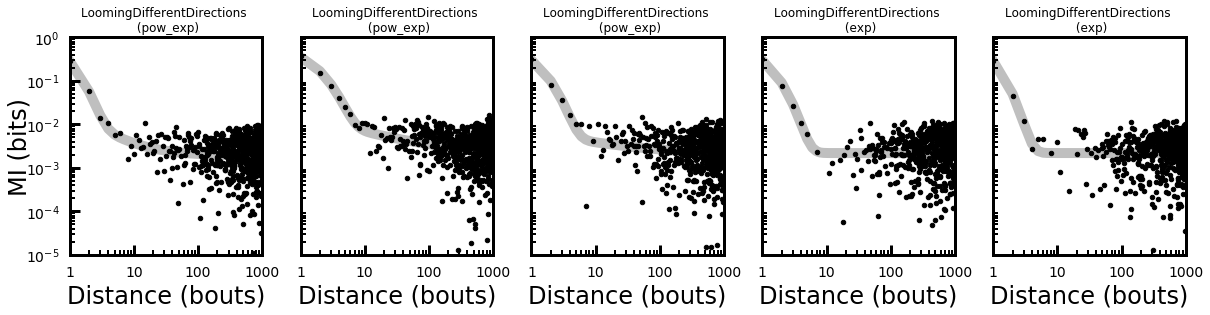

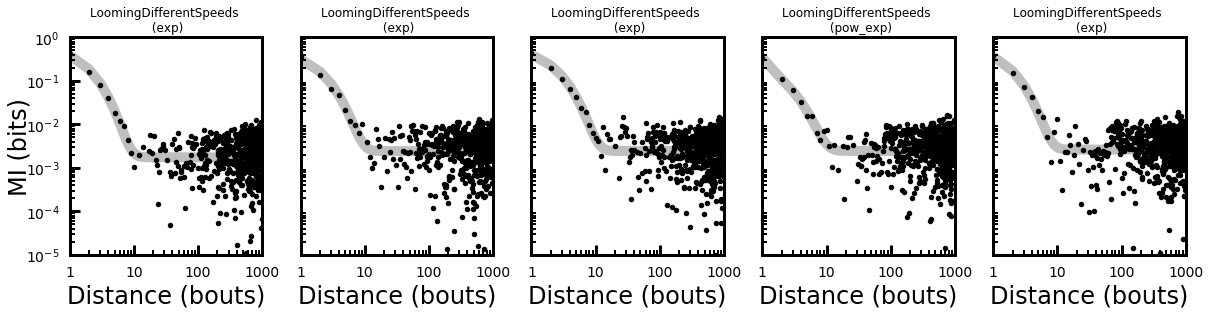

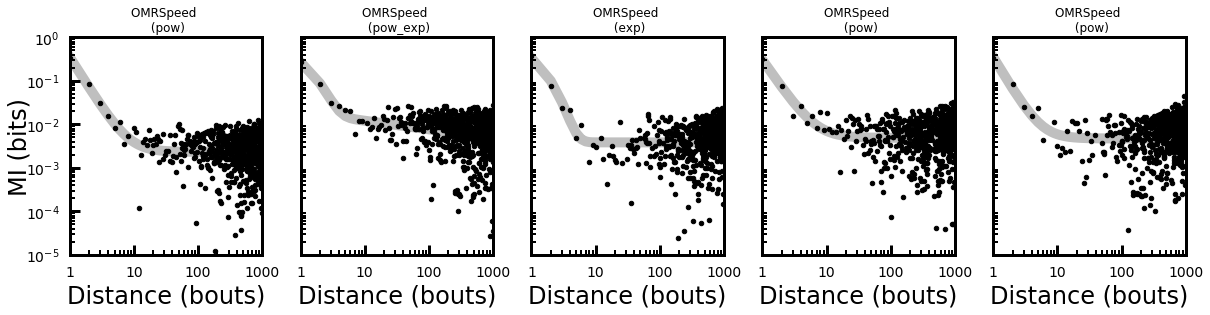

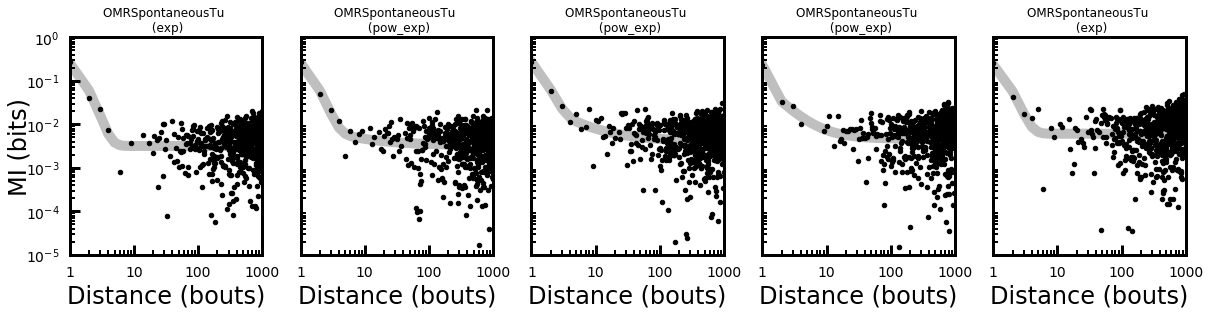

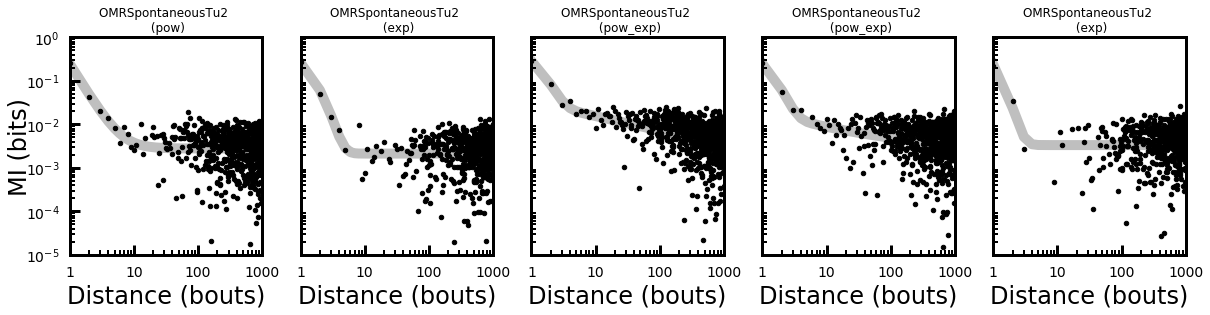

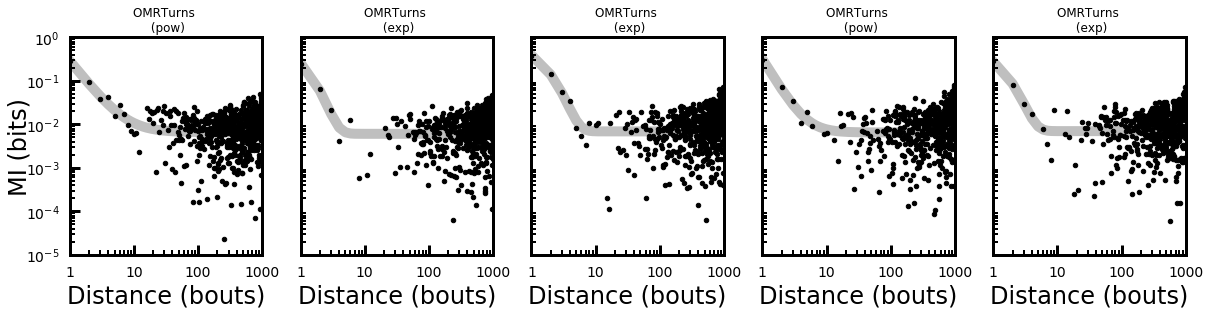

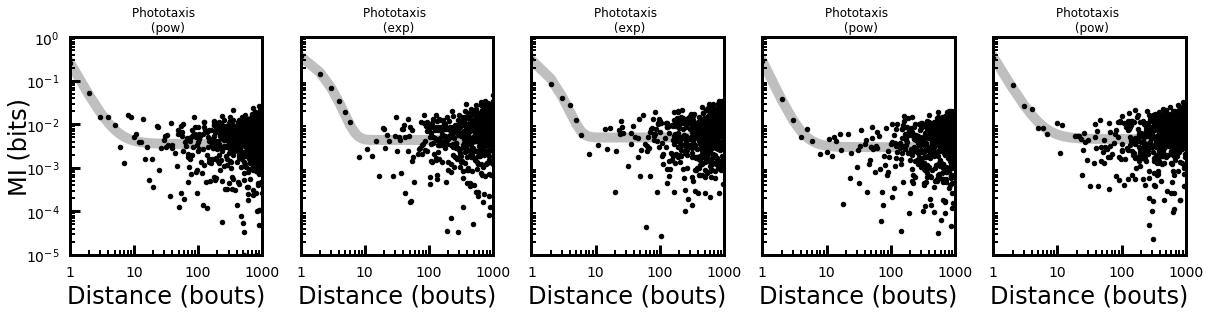

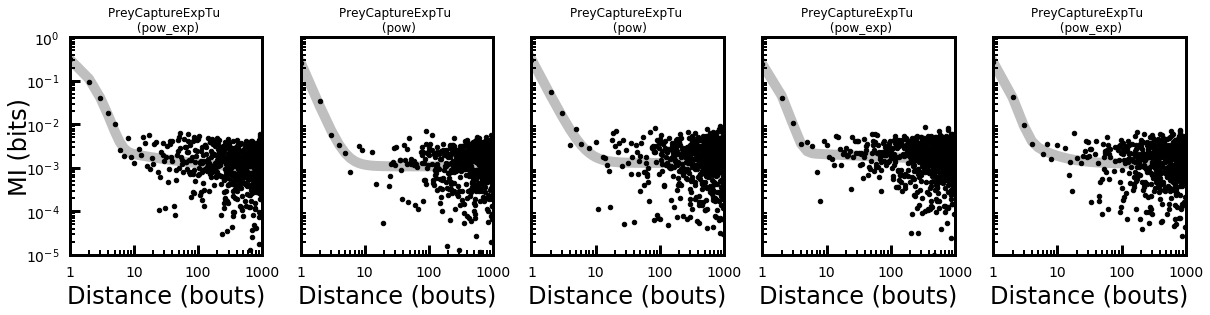

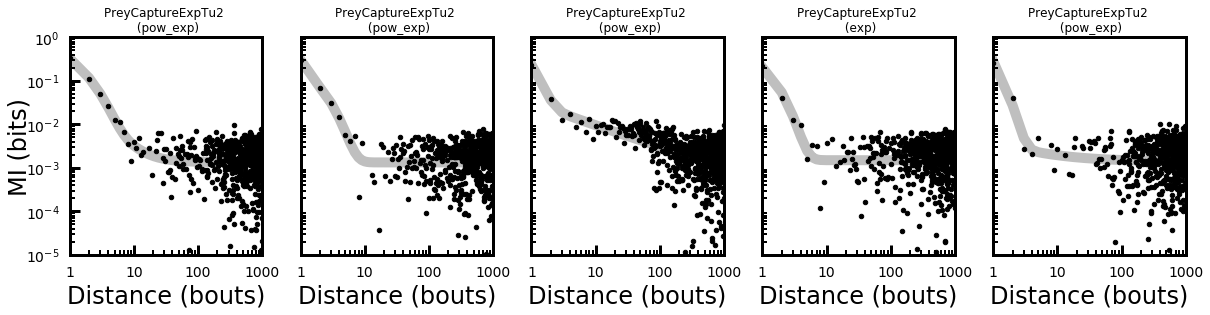

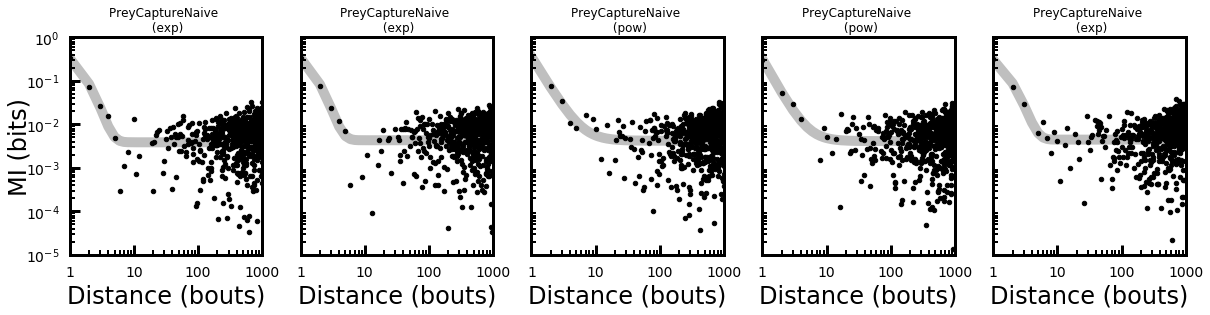

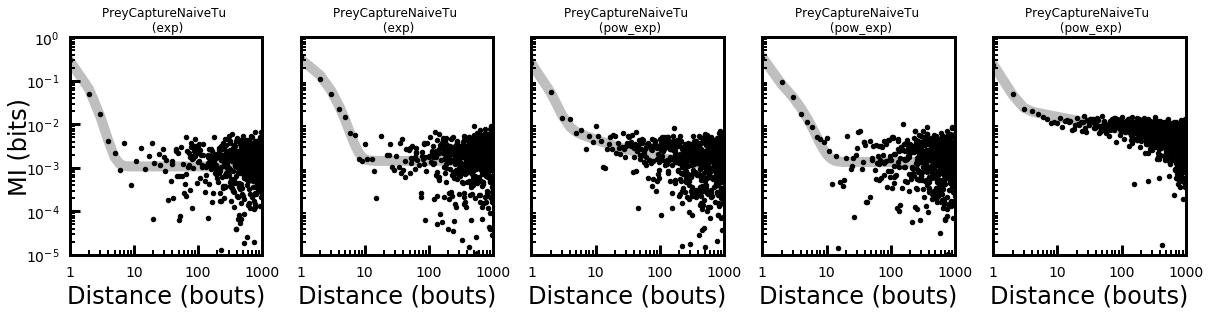

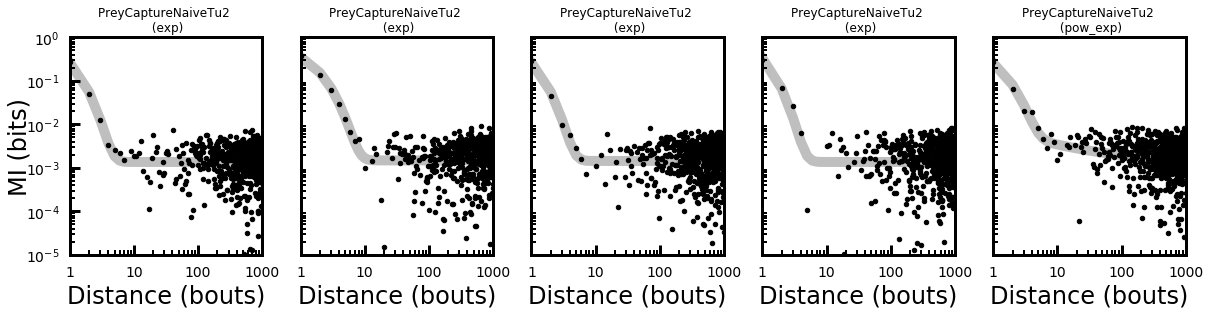

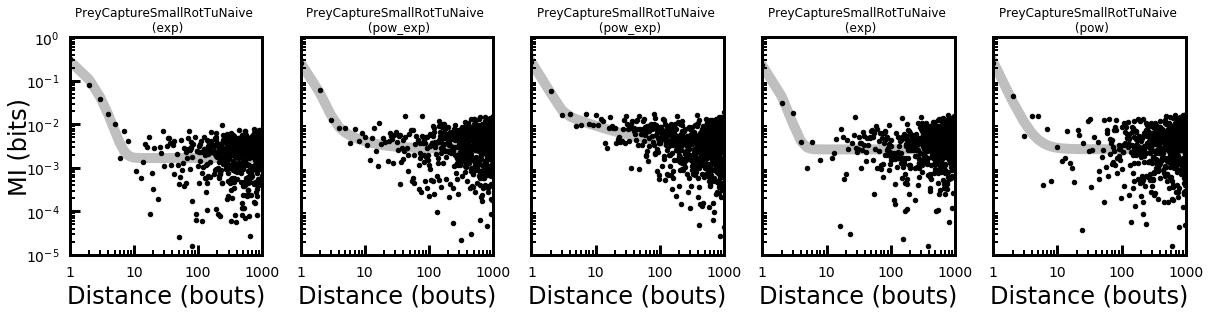

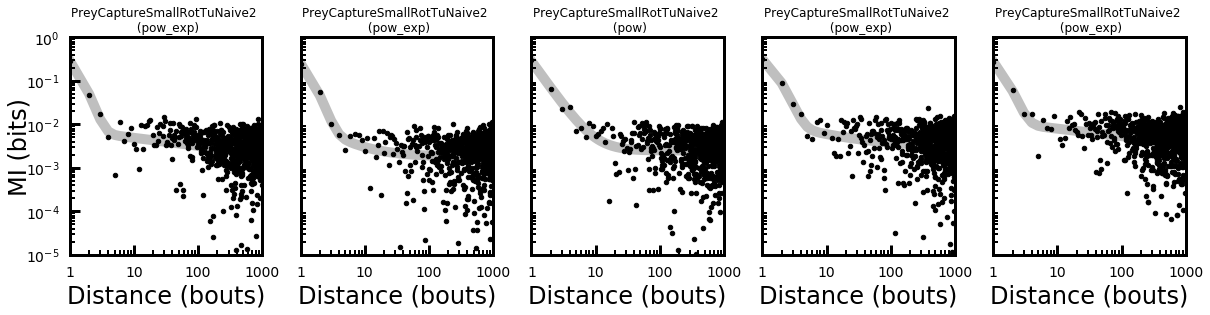

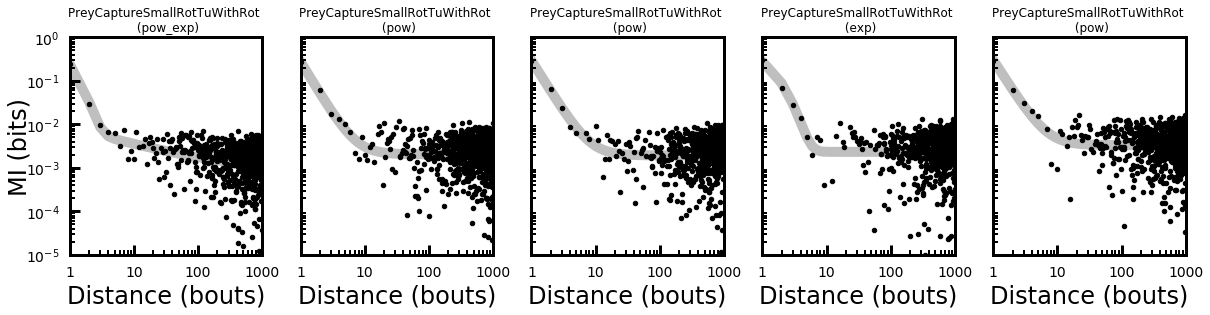

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


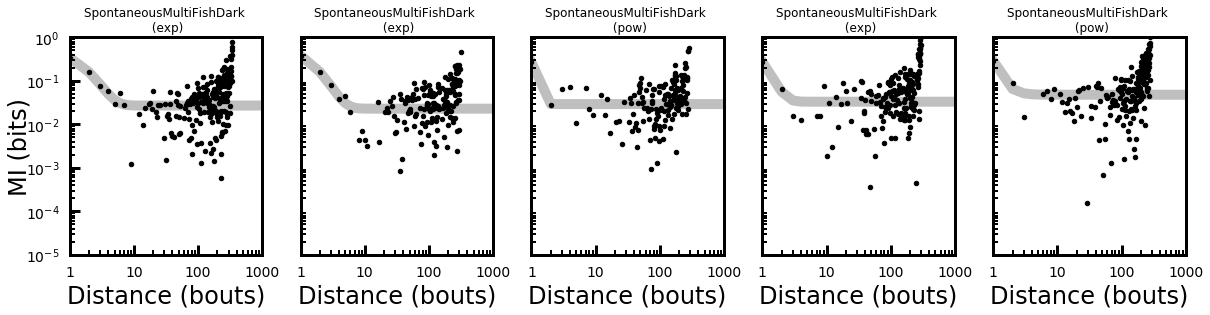

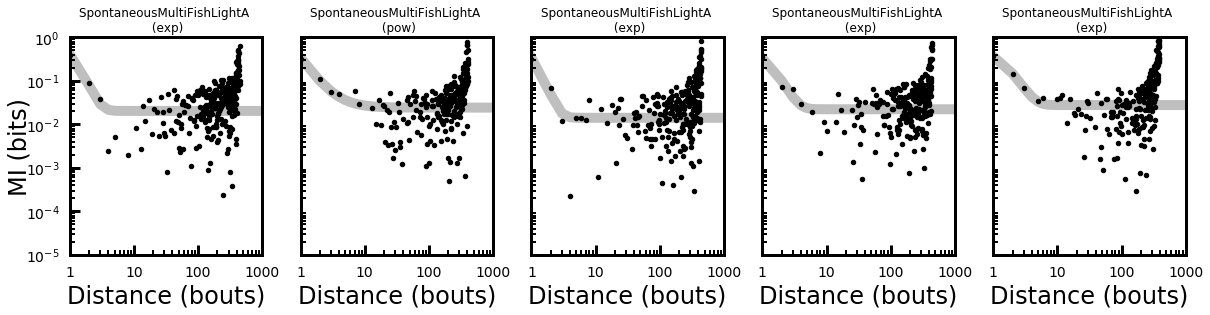

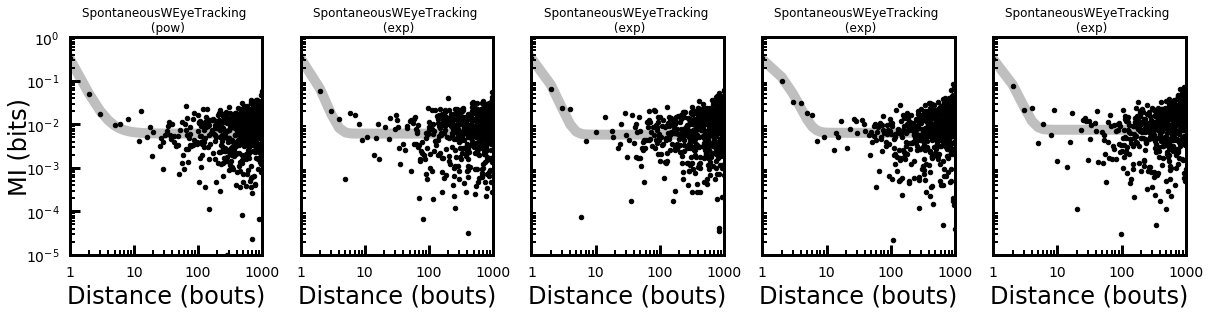

In [23]:
ncols = 5
nrows = 1
yoff=-.20


for condition in np.unique(MI_DF.condition):
    
    condition_df = MI_DF[MI_DF.condition == condition]
    
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 4))
    for axi, (idx, row) in enumerate(condition_df[:nrows*ncols].iterrows()):
        ax = axs.flatten()[axi]

        color = "k"
        sig = np.array(row.MI - row.shuff_MI)
        distances = row.distances

        sig_lims = np.log([np.min(sig[sig>0]), np.nanmax(sig)])
        sig_lims = [sig_lims[0] - (sig_lims[1]-sig_lims[0])/10,
                        sig_lims[1] + (sig_lims[1]-sig_lims[0])/10]


        if axi in [ncols*i for i in range(nrows)]:
            ax.set_ylabel("MI (bits)", labelpad=5, fontsize=24)
            ax.yaxis.set_label_coords(yoff, 0.5)

        
        distances_model = np.logspace(0, np.log10(distances[-1]), base=10, num=1000)

        # plot real data
        ax.scatter(distances, sig, alpha=1, s=20, color=color)
        #print(idx)
        if row.bestfitmodel == "pow_exp":
            y_model = mf.get_y(mf.pow_exp_decay, row.concat_results, distances)

        elif row.bestfitmodel == "exp":
            y_model = mf.get_y(mf.exp_decay, row.exp_results, distances)

        elif row.bestfitmodel == "pow":
            y_model = mf.get_y(mf.powerlaw_decay, row.pow_results, distances)

        #print(y_model[:3])
        # plot modelled data
        ax.plot(distances, y_model, alpha=0.25, lw=10, color=color)

        ax.set_title("{} \n ({})".format(row.condition, row.bestfitmodel))
        ax.set_xlim([distances[0], distances[-1]])
        sig_lims[0] = np.log(10e-6)  #
        ax.set_ylim([1e-5, 1])
        ax.tick_params(which="both", direction="in", labelsize=14, pad=10)
        ax.tick_params(which="major", length=10, width=3)
        ax.tick_params(which="minor", length=5, width=2)
        ax.set_xscale("log", basex=10)
        ax.set_yscale("log", basey=10)
        ax.set_xticks([])
        for axis in ["top", "bottom", "left", "right"]:
            ax.spines[axis].set_linewidth(3)
            ax.spines[axis].set_color("k")

        if axi in range(nrows*ncols - ncols, nrows*ncols):
            ax.set_xticks([1,10,100, 1000])
            ax.set_xticklabels(['1','10','100', '1000'])
            ax.set_xlabel("Distance (bouts)", labelpad=5, fontsize=24)
        if axi != 0:
            ax.set_yticks([])
    ensure_dir(FIGURE_DIR/ 'mi' / 'indv')
    save_fig(FIGURE_DIR/ 'mi' / 'indv' /('drosophila_mi_individual_'+row.condition))
    plt.show()

In [6]:
### plot by condition